# <b> Introdução </b>
Nosso primeiro resultado será "IBGE - API de serviço de dados", que nos levará direto a uma API com informações coletadas no censo de 2010, divididas em "Frequência por nome" e "Ranking por frequência".

In [133]:
import pandas as pd

## 1 - Lendo nomes com Json

In [134]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

#### Lendo arquivos Json

In [135]:
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [136]:
nomes_m= pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")

In [137]:
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


#### Sorteando nomes

In [138]:
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
123,IVONE,0,131256,124,F
96,TANIA,0,172242,97,F
174,CLEONICE,0,90779,175,F
192,ZILDA,0,82927,193,F
128,JOICE,0,127087,129,F


#### Contando nomes armazenados

In [139]:
print(f"Quantidade de nomes: " + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


#### Juntando os frames

In [140]:
frames = [nomes_f, nomes_m]
frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],
           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   19

In [141]:
nomes = pd.concat(frames)['nome'].to_frame()
nomes

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
...,...
195,WALTER
196,ARLINDO
197,MICHAEL
198,ALVARO



#### Incluindo ID dos alunos

In [142]:
import numpy as np

In [143]:
np.random.seed(123)

In [144]:
total_alunos = len(nomes)
total_alunos

400

In [145]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1
nomes

,nome,id_aluno
0,MARIA,235
1,ANA,43
2,FRANCISCA,304
3,ANTONIA,156
4,ADRIANA,343
...,...,...
195,WALTER,231
196,ARLINDO,99
197,MICHAEL,323
198,ALVARO,383


### Criando e-mail


In [146]:
dominio = ['@dominiodoemail.com.br' , '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominio, total_alunos)

In [147]:
nomes

,nome,id_aluno,dominio
0,MARIA,235,@dominiodoemail.com.br
1,ANA,43,@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com
3,ANTONIA,156,@servicodoemail.com
4,ADRIANA,343,@servicodoemail.com
...,...,...,...
195,WALTER,231,@dominiodoemail.com.br
196,ARLINDO,99,@servicodoemail.com
197,MICHAEL,323,@dominiodoemail.com.br
198,ALVARO,383,@servicodoemail.com


In [148]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()
nomes

,nome,id_aluno,dominio,email
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com
3,ANTONIA,156,@servicodoemail.com,antonia@servicodoemail.com
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com
...,...,...,...,...
195,WALTER,231,@dominiodoemail.com.br,walter@dominiodoemail.com.br
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br
198,ALVARO,383,@servicodoemail.com,alvaro@servicodoemail.com


## 2 - Criando cursos

#### Instalando bibliotecas

In [149]:
!pip install html5lib
!pip install lxml

In [150]:
import html5lib

In [151]:
url = 'https://tabela-cursos.herokuapp.com/index.html'


In [152]:
cursos = pd.read_html(url)

In [153]:
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

#### Convertendo para dataframe

In [154]:
cursos = cursos[0]

In [155]:
cursos.sample(5)

,Nome do curso
6,.NET para web
5,PHP com MySql
14,Análise de dados
4,Cursos de Python
15,Estatística básica


#### Alterando o index

In [156]:

cursos = cursos.rename(columns= {'Nome do curso' : 'nome_do_curso'})

In [157]:
cursos.sample(6)

,nome_do_curso
17,Programação funcional
16,Internet das coisas
15,Estatística básica
0,Lógica de programação
12,Persistência com .NET
2,C# para Web


#### Criando ID

In [158]:
cursos['id'] = cursos.index + 1

In [159]:
cursos

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
5,PHP com MySql,6
6,.NET para web,7
7,Novas integrações com Java,8
8,TDD com Java,9
9,Código limpo com C#,10


#### Mudando o index

In [160]:
cursos = cursos.set_index('id')

In [161]:
cursos.head(6)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql


# 3 - Escrevendo csv, json e html

#### Matriculando os alunos nos cursos

In [162]:
nomes.sample(5)

,nome,id_aluno,dominio,email
105,MILENA,371,@dominiodoemail.com.br,milena@dominiodoemail.com.br
149,ISRAEL,65,@servicodoemail.com,israel@servicodoemail.com
95,ANDREA,292,@dominiodoemail.com.br,andrea@dominiodoemail.com.br
66,DANILO,348,@servicodoemail.com,danilo@servicodoemail.com
63,ERICA,228,@servicodoemail.com,erica@servicodoemail.com


In [163]:
nomes['matriculas'] = np.ceil(np.random.exponential(size= total_alunos)* 1.5).astype(int)

In [164]:
nomes

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br,2
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,1
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,1
3,ANTONIA,156,@servicodoemail.com,antonia@servicodoemail.com,6
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,1
...,...,...,...,...,...
195,WALTER,231,@dominiodoemail.com.br,walter@dominiodoemail.com.br,1
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com,2
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,1
198,ALVARO,383,@servicodoemail.com,alvaro@servicodoemail.com,3


In [165]:
nomes.matriculas.describe()

count    400.000000
mean       1.950000
std        1.492672
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       10.000000
Name: matriculas, dtype: float64

#### Visualizando atráves do seaborn

In [166]:
import seaborn as sns

c:\Users\marcu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

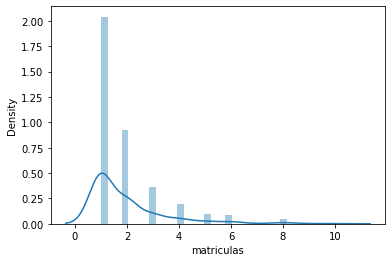

In [167]:
sns.distplot(nomes.matriculas)

#### Quantidade de cursos por alunos

In [168]:
cursos_alunos = nomes.matriculas.value_counts().to_frame()

In [169]:
cursos_alunos

,matriculas
1,216
2,98
3,38
4,21
5,10
6,9
8,5
7,1
10,1
9,1


In [170]:

cursos_alunos.index.name ='qtd_cursos'
cursos_alunos

,matriculas
qtd_cursos,
1,216
2,98
3,38
4,21
5,10
6,9
8,5
7,1
10,1


In [171]:
cursos_alunos.rename(columns = {'matriculas' : 'alunos_matriculados'})

,alunos_matriculados
qtd_cursos,
1,216
2,98
3,38
4,21
5,10
6,9
8,5
7,1
10,1


#### Selecionando cursos

Para fazermos essa distribuição, criaremos três variáveis. A primeira delas é total_matriculas, que será inicializada como um array vazio. Em seguida, criaremos uma variável x que receberá a chamada de np.random.rand(20, uma maneira de calcularmos randomicamente os 20 cursos que temos no dataframe. Por fim, teremos uma variável prob (de probabilidade) que receberá a divisão de x por sum(x) (a soma de x).

In [172]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

Depois de inicializarmos essas variáveis, a ideia é buscarmos em cada linha do dataframe o nome, o id_aluno e a quantidade de matriculas para então atribuirmos aos alunos a quantidade correta de cursos escolhidos aleatoriamente.

Passaremos para a criação de um iterador for que buscará o index e a linha que iremos utilizar, a qual chamaremos de row. Esse iterador percorrerá o dataframe nomes com o auxílio da função iterrows(), que nos devolve cada linha do conjunto.

In [173]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas

De posse dessas informações, precisamos decidir quantos cursos terão que ser atribuídos a cada aluno com base na sua quantidade de matrículas. Para isso, teremos um novo iterador for que buscará cada elemento (i) no intervalo range(matriculas) (de 0 até o valor de matriculas). Teremos então uma matrícula mat que receberá o id do aluno e o id do curso, que conseguiremos aleatoriamente utilizando a função np.random.choice(). Esta, por sua vez, receberá como parâmetros o índice de cursos (cursos.index e a variável de probabilidade que inicializamos anteriormente (p = prob).

In [174]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns =['id_aluno', 'id_curso'])
matriculas.head(5)

,id_aluno,id_curso
0,235,17
1,235,8
2,43,16
3,304,20
4,156,19


In [175]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso'])

,id_aluno,nome_do_curso
id_curso,,
1,1,Lógica de programação
2,63,Java para Web
3,21,C# para Web
4,39,Ruby on Rails
5,65,Cursos de Python
6,60,PHP com MySql
7,13,.NET para web
8,10,Novas integrações com Java
9,46,TDD com Java


In [176]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno' : 'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,1,Lógica de programação
2,63,Java para Web
3,21,C# para Web
4,39,Ruby on Rails
5,65,Cursos de Python
6,60,PHP com MySql
7,13,.NET para web
8,10,Novas integrações com Java
9,46,TDD com Java


In [177]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno' : 'quantidade_de_alunos'})

In [178]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,1,Lógica de programação
2,63,Java para Web
3,21,C# para Web
4,39,Ruby on Rails
5,65,Cursos de Python
6,60,PHP com MySql
7,13,.NET para web
8,10,Novas integrações com Java
9,46,TDD com Java


#### Exportando o dataframe para csv


In [179]:
matriculas_por_curso.to_csv('matriculas_por_curso', index = False)

In [180]:
pd.read_csv('matriculas_por_curso.')

,quantidade_de_alunos,nome_do_curso
0,1,Lógica de programação
1,63,Java para Web
2,21,C# para Web
3,39,Ruby on Rails
4,65,Cursos de Python
5,60,PHP com MySql
6,13,.NET para web
7,10,Novas integrações com Java
8,46,TDD com Java
9,44,Código limpo com C#


#### Exportando para JSON

In [181]:
matriculas_json = matriculas_por_curso.to_json()


In [182]:
matriculas_json

'{"quantidade_de_alunos":{"1":1,"2":63,"3":21,"4":39,"5":65,"6":60,"7":13,"8":10,"9":46,"10":44,"11":46,"12":18,"13":42,"14":22,"15":23,"16":27,"17":55,"18":54,"19":68,"20":63},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

#### Exportando para HTML

In [183]:
matriculas_html = matriculas_por_curso.to_html()

In [184]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>63</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>21</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>39</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>65</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>60</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>13</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>10</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>46</td>
 

# 4 - Lendo e escrevendo SQL

#### Instalando SQLAlchemy

In [185]:
!pip3 install sqlalchemy

In [186]:
from sqlalchemy import create_engine, MetaData, Table

In [187]:
engine = create_engine('sqlite:///:memory:')

In [188]:
engine

Engine(sqlite:///:memory:)

In [189]:
matriculas_por_curso.to_sql('matriculas', engine)

20

In [190]:
print(engine.table_names())

['matriculas']


C:\Users\marcu\AppData\Local\Temp\ipykernel_4968\1043810782.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


#### Fazendo query em banco de dados

In [191]:
query = 'select * from matriculas where quantidade_de_alunos < 10'


In [192]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,1,1,Lógica de programação


#### Lendo a tabela sql

In [193]:
pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,1
1,Java para Web,63
2,C# para Web,21
3,Ruby on Rails,39
4,Cursos de Python,65
5,PHP com MySql,60
6,.NET para web,13
7,Novas integrações com Java,10
8,TDD com Java,46
9,Código limpo com C#,44


#### Query com o próprio pandas

In [194]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

In [195]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos >60')
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
1,Java para Web,63
4,Cursos de Python,65
18,Boas práticas em Java,68
19,Orientação objetos com Java,63


#### Escrevendo no banco de dados

In [196]:
muitas_matriculas.to_sql('muitas_matriculas', con= engine)

4

In [197]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


C:\Users\marcu\AppData\Local\Temp\ipykernel_4968\1043810782.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


# 5 - Lendo e escrevendo no Excel

In [198]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,1,Lógica de programação
2,63,Java para Web
3,21,C# para Web
4,39,Ruby on Rails
5,65,Cursos de Python
6,60,PHP com MySql
7,13,.NET para web
8,10,Novas integrações com Java
9,46,TDD com Java


In [199]:
matriculas

,id_aluno,id_curso
0,235,17
1,235,8
2,43,16
3,304,20
4,156,19
...,...,...
775,366,17
776,366,14
777,366,9
778,366,11


In [216]:
id_curso = list(matriculas['id_curso'].unique())
id_curso

[17, 8, 16, 20, 19, 2, 13, 5, 6, 18, 11, 10, 9, 4, 14, 7, 15, 12, 3, 1]

In [217]:
proxima_turma = matriculas.query("id_curso == {}". format(id_curso))
proxima_turma.head()

,id_aluno,id_curso
0,235,17
1,235,8
2,43,16
3,304,20
4,156,19


#### Descobrindo os nomes dos alunos

In [207]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
135,ROSILENE,387,@servicodoemail.com,rosilene@servicodoemail.com,3
23,FERNANDO,321,@dominiodoemail.com.br,fernando@dominiodoemail.com.br,1
35,ALEXANDRE,188,@servicodoemail.com,alexandre@servicodoemail.com,1


In [227]:
turma_alunos_e_cursos = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))
turma_alunos_e_cursos

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
1,16,SABRINA,@dominiodoemail.com.br,sabrina@dominiodoemail.com.br,6
1,9,SABRINA,@dominiodoemail.com.br,sabrina@dominiodoemail.com.br,6
1,10,SABRINA,@dominiodoemail.com.br,sabrina@dominiodoemail.com.br,6
1,4,SABRINA,@dominiodoemail.com.br,sabrina@dominiodoemail.com.br,6
1,11,SABRINA,@dominiodoemail.com.br,sabrina@dominiodoemail.com.br,6
...,...,...,...,...,...
397,2,LILIAN,@dominiodoemail.com.br,lilian@dominiodoemail.com.br,1
398,11,CRISTIAN,@servicodoemail.com,cristian@servicodoemail.com,1
399,18,CICERA,@dominiodoemail.com.br,cicera@dominiodoemail.com.br,2


Assim temos um resultado mais interessante, mas ainda existem pontos a solucionar. Por exemplo, não estamos passando o curso que esses alunos estão matriculados, o que pode resultar em confusões caso apareçam alunos com o mesmo nome. A ideia é incluirmos o nome do curso no nosso dataframe.

In [219]:
nome_curso = cursos.loc[id_curso]
nome_curso

,nome_do_curso
id,
17,Internet das coisas
8,Novas integrações com Java
16,Estatística básica
20,Orientação objetos com Java
19,Boas práticas em Java
2,Java para Web
13,Persistência com .NET
5,Cursos de Python
6,PHP com MySql


#### Filtrando apenas por curso, exemplo estatística.

In [228]:
id_curso = 16
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))

In [229]:
proxima_turma.head()

,id_aluno,id_curso
2,43,16
17,92,16
46,80,16
75,262,16
86,268,16


In [230]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
1,16,SABRINA,@dominiodoemail.com.br,sabrina@dominiodoemail.com.br,6
2,16,CESAR,@dominiodoemail.com.br,cesar@dominiodoemail.com.br,2
43,16,ANA,@servicodoemail.com,ana@servicodoemail.com,1
44,16,NICOLAS,@servicodoemail.com,nicolas@servicodoemail.com,8
46,16,DOUGLAS,@dominiodoemail.com.br,douglas@dominiodoemail.com.br,8
73,16,ISABELA,@dominiodoemail.com.br,isabela@dominiodoemail.com.br,3
80,16,VITORIA,@servicodoemail.com,vitoria@servicodoemail.com,2
85,16,ANGELO,@servicodoemail.com,angelo@servicodoemail.com,6
91,16,LORENA,@dominiodoemail.com.br,lorena@dominiodoemail.com.br,8


In [231]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [232]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [233]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [237]:
proxima_turma_estatistica = proxima_turma.rename(columns = {'nome':'Alunos do curso de {}'.format(nome_curso)})
proxima_turma_estatistica

,Alunos do curso de Estatística básica
id_aluno,
1,SABRINA
2,CESAR
43,ANA
44,NICOLAS
46,DOUGLAS
73,ISABELA
80,VITORIA
85,ANGELO
91,LORENA


#### Exportando e lendo Excel

In [239]:
proxima_turma_estatistica.to_excel('Turma_estatistica.xlsx', index = False)

In [240]:
pd.read_excel('Turma_estatistica.xlsx')

,Alunos do curso de Estatística básica
0,SABRINA
1,CESAR
2,ANA
3,NICOLAS
4,DOUGLAS
5,ISABELA
6,VITORIA
7,ANGELO
8,LORENA
9,ALINE
